<a href="https://colab.research.google.com/github/yubingmnyang/MATH2310/blob/main/MATH2310_P1_yy833.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top-left 10x10 submatrix of Laplacian L:
 [[ 8 -1 -1 -1  0  0  0 -1 -1  0]
 [-1  8 -1 -1  0  0  0 -1 -1  0]
 [-1 -1  8 -1  0  0  0 -1 -1  0]
 [-1 -1 -1  8  0  0  0 -1 -1  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  5 -1  0  0 -1]
 [ 0  0  0  0  0 -1  5  0  0 -1]
 [-1 -1 -1 -1  0  0  0  8 -1  0]
 [-1 -1 -1 -1  0  0  0 -1  8  0]
 [ 0  0  0  0  0 -1 -1  0  0  5]]


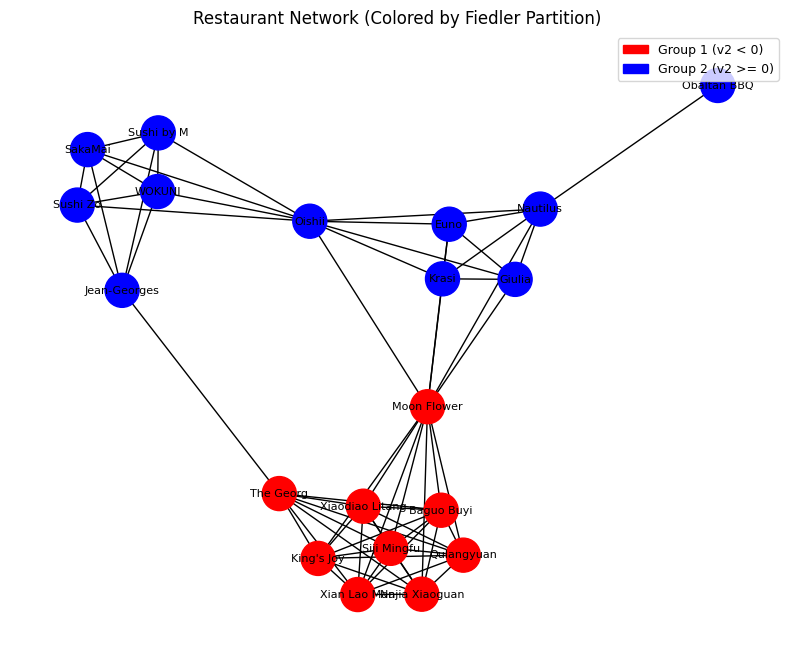


Eigenvalues (sorted):
 [-1.66594989e-15  6.91578761e-01  7.65103261e-01  1.73304100e+00
  5.63116760e+00  6.00000000e+00  6.00000000e+00  6.00000000e+00
  6.00000000e+00  6.00000000e+00  6.91433928e+00  9.00000000e+00
  9.00000000e+00  9.00000000e+00  9.00000000e+00  9.00000000e+00
  9.00000000e+00  9.05672313e+00  1.00096878e+01  1.31983592e+01]

Multiplicity of lambda=0: 1

Fiedler value (lambda2): 0.6916

Fiedler Partition:
Group 1 (Negative v2): ["King's Joy", 'Baguo Buyi', 'Siji Mingfu', 'Najia Xiaoguan', 'The Georg', 'Xiaodiao Litang', 'Moon Flower', 'Xian Lao Man', 'Qulangyuan']
Group 2 (Nonnegative v2): ['Euno', 'SakaMai', 'Sushi Zo', 'WOKUNI', 'Giulia', 'Oishii', 'Nautilus', 'Obaltan BBQ', 'Krasi', 'Jean-Georges', 'Sushi by M']


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 1. Restaurant list: (Name, City, Cuisine)
restaurants = [
    ("King's Joy",   "Beijing",   "Chinese"),
    ("Baguo Buyi",       "Beijing",   "Chinese"),
    ("Siji Mingfu",  "Beijing",   "Chinese"),
    ("Najia Xiaoguan",       "Beijing",   "Chinese"),
    ("Euno",         "Boston",    "Italian"),
    ("SakaMai",      "NYC",       "Japanese"),
    ("Sushi Zo",     "NYC",       "Japanese"),
    ("The Georg",    "Beijing",   "French"),
    ("Xiaodiao Litang",        "Beijing",   "Chinese"),
    ("WOKUNI",       "NYC",       "Japanese"),
    ("Giulia",       "Boston",    "Italian"),
    ("Oishii",       "Boston",    "Japanese"),
    ("Nautilus",     "Boston",    "AsianFusion"),
    ("Obaltan BBQ",  "FortLee",   "Korean"),   # originally isolated
    ("Krasi",        "Boston",    "Greek"),
    ("Jean-Georges", "NYC",       "French"),
    ("Sushi by M",   "NYC",       "Japanese"),
    ("Moon Flower",  "Boston",    "Chinese"),
    ("Xian Lao Man", "Beijing",   "Chinese"),
    ("Qulangyuan",   "Beijing",   "Chinese")
]

n = len(restaurants)

# 2. Build adjacency matrix A
A = np.zeros((n, n), dtype=int)
for i in range(n):
    for j in range(n):
        if i != j:
            same_city = (restaurants[i][1] == restaurants[j][1])
            same_cuisine = (restaurants[i][2] == restaurants[j][2])
            if same_city or same_cuisine:
                A[i,j] = 1

# 3. Add edge between Obaltan BBQ (index 13) and Nautilus (index 12) to ensure connectivity
A[13, 12] = 1
A[12, 13] = 1

# 4. Construct Laplacian: L = D - A
D = np.diag(A.sum(axis=1))
L = D - A

# (Optional) Show top-left 10x10 of L
print("Top-left 10x10 submatrix of Laplacian L:\n", L[:10, :10])

# 5. Create a NetworkX graph
G = nx.Graph()
G.add_nodes_from(range(n))  # nodes = 0..19
for i in range(n):
    for j in range(i+1, n):
        if A[i,j] == 1:
            G.add_edge(i, j)

# 6. Compute eigenvalues/eigenvectors
eigenvals, eigenvects = np.linalg.eig(L)
idx_sorted = np.argsort(eigenvals)
eigs_sorted = eigenvals[idx_sorted]
vecs_sorted = eigenvects[:, idx_sorted]

# Identify multiplicity of lambda=0
zero_count = sum(np.isclose(eigs_sorted, 0, atol=1e-7))
lambda2 = eigs_sorted[1]
fiedler_vec = vecs_sorted[:, 1]

# Partition based on sign of v2
group1_indices = [i for i, val in enumerate(fiedler_vec) if val < 0]
group2_indices = [i for i, val in enumerate(fiedler_vec) if val >= 0]

# Prepare node colors: group1 = 'red', group2 = 'blue'
node_colors = []
for i in range(n):
    if i in group1_indices:
        node_colors.append('red')
    else:
        node_colors.append('blue')

# 7. Draw the network
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10,8))

nx.draw_networkx_nodes(G, pos, node_color=node_colors,
                       node_size=600)
nx.draw_networkx_edges(G, pos)
labels = {i: restaurants[i][0] for i in range(n)}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

# 8. Add color legend
group1_patch = mpatches.Patch(color='red', label='Group 1 (v2 < 0)')
group2_patch = mpatches.Patch(color='blue', label='Group 2 (v2 >= 0)')
plt.legend(handles=[group1_patch, group2_patch],
           loc='upper right', fontsize=9)

plt.title("Restaurant Network (Colored by Fiedler Partition)")
plt.axis('off')
plt.show()

# 9. Print results
print("\nEigenvalues (sorted):\n", eigs_sorted)
print("\nMultiplicity of lambda=0:", zero_count)
print(f"\nFiedler value (lambda2): {lambda2:.4f}")

# Show final partition
group1_names = [restaurants[i][0] for i in group1_indices]
group2_names = [restaurants[i][0] for i in group2_indices]
print("\nFiedler Partition:")
print("Group 1 (Negative v2):", group1_names)
print("Group 2 (Nonnegative v2):", group2_names)
